<a href="https://colab.research.google.com/github/dishapalan02/AI-Enabled-IT-Service-Ticketing-tool/blob/main/AI_Enabled_IT_Service_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

Most of the IT organizations levarages incident management process to address any unplanned interruptions to the services which affects business and its users.

The incidents are generally created by various stakeholders like end users, vendors, IT users, etc. They might not have right information as to which team the ticket should go to. Hence, to imporve and retain customer satisfaction, it is very important that the ticket is assigned to the right group of people for faster and approproiate resolution. In Many Organizations this is still a manual process. There re few problems with the manual process:
1. Manual assignment of incidents is time consuming
2. It requires human efforts
3. There may bemistakes due to human errors and resource consumption is carried out ineffectively because ofthe misaddressing
4. Manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service

**Solution we are providing:**

We are here building an AI Enabled system which will classify the incidents to the right functional group. Guided by AI, organizations can reduce the resolution time and focus on more productive tasks. This will overcome or save time with below losses that occur due to manual process where :
1. ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment 
2. 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams
3. Around ~25% of Incidents are wrongly assigned to functional teams.Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Fetch the data from input data stored in Goolge drive
incidents_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/input_data.xlsx')

In [24]:
# Check the first 5 rows of data
incidents_data.head(5)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [6]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 251kB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


                                             |          | [  0%]   00:00 -> (? left)

Report Incidents.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



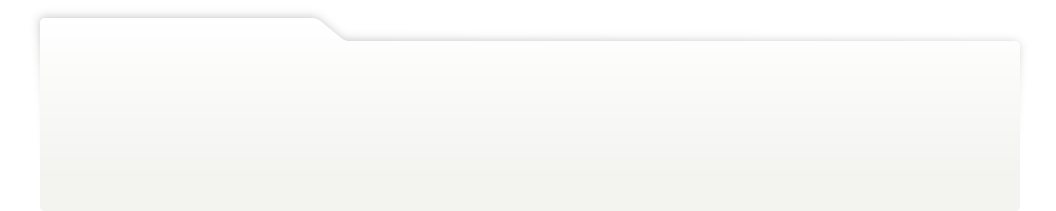
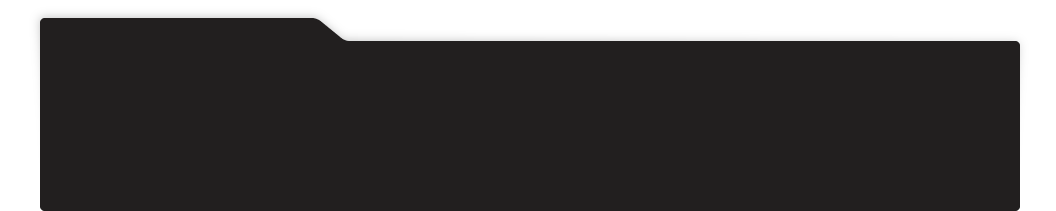
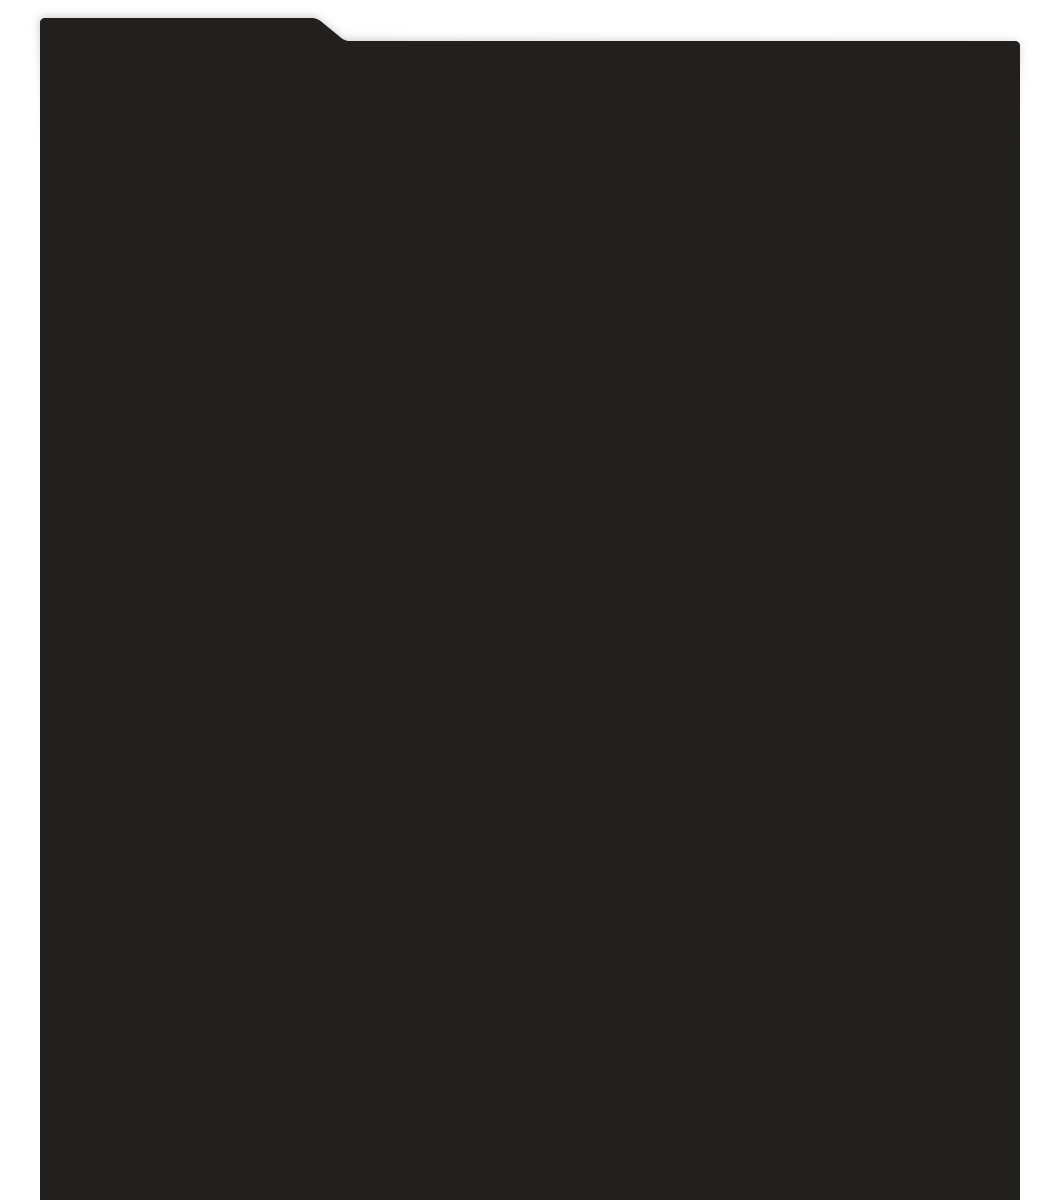
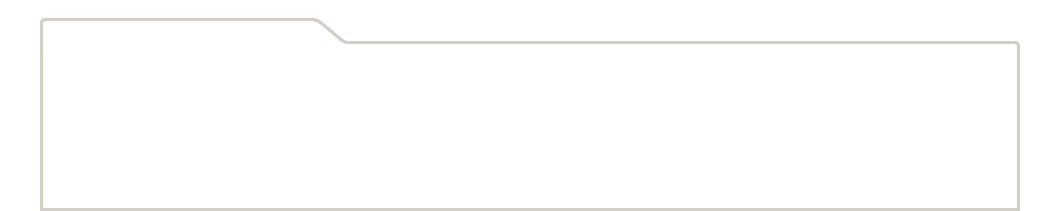
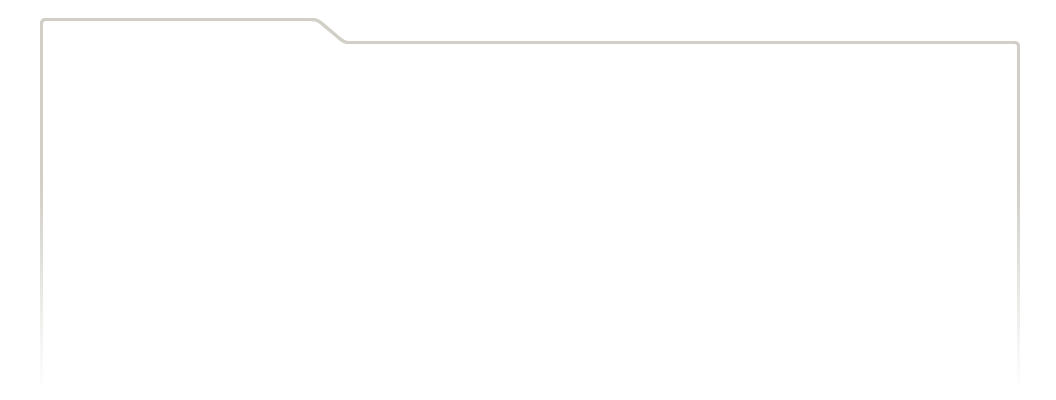
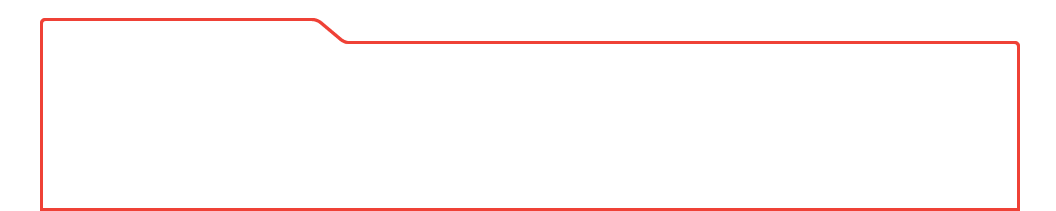
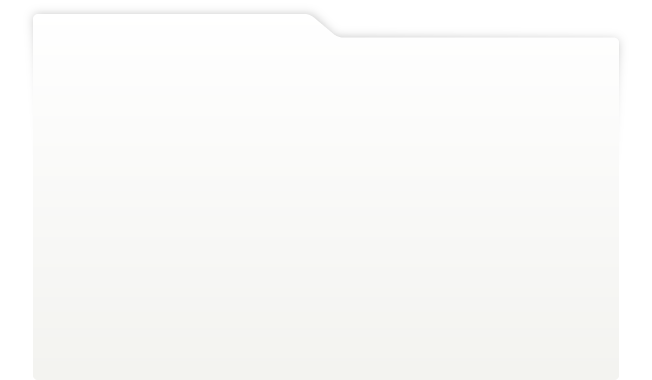
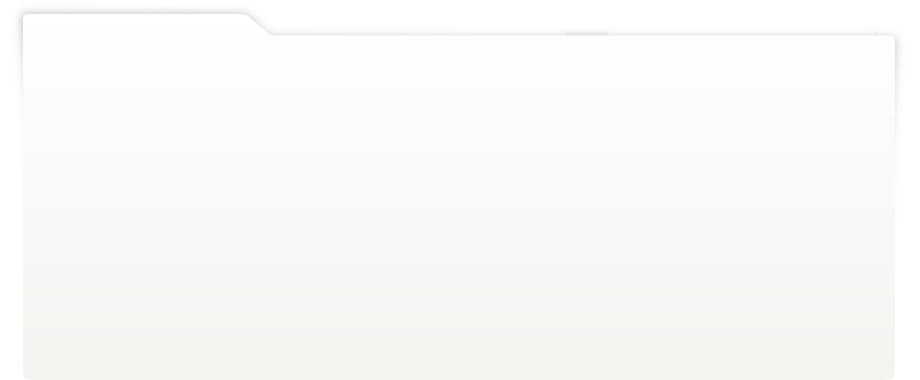
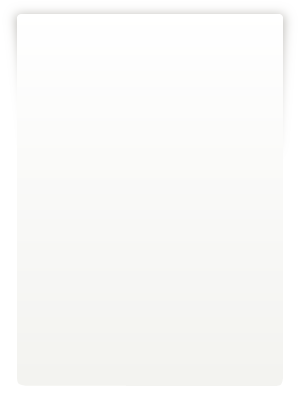
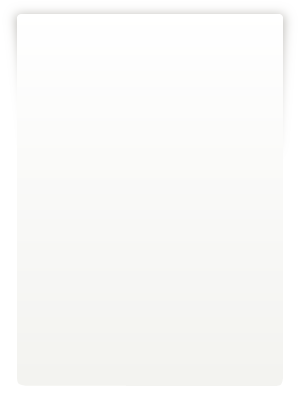
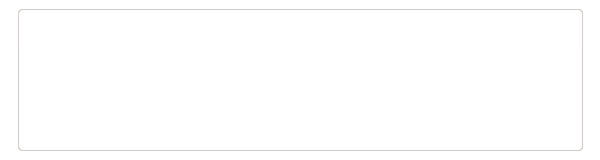
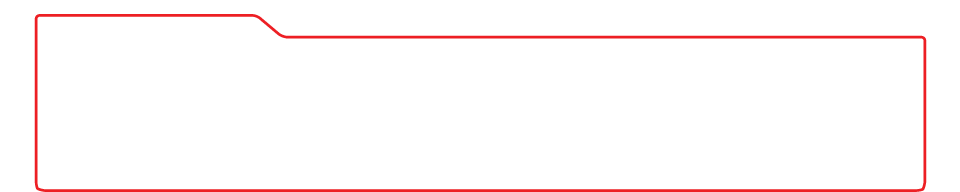
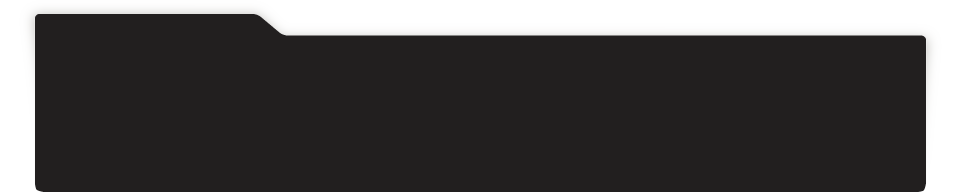
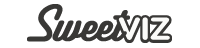
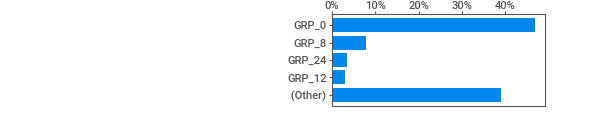
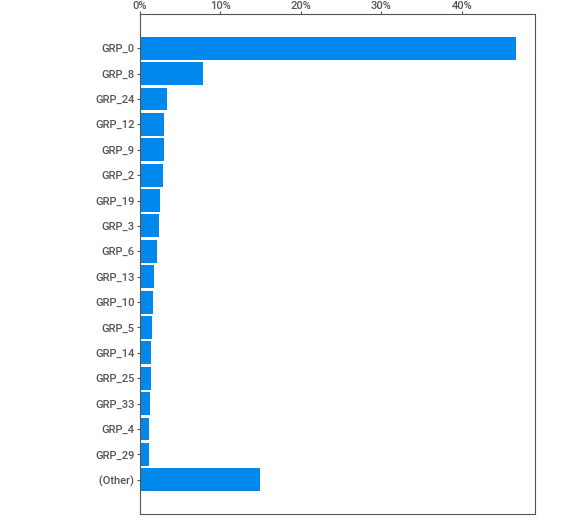
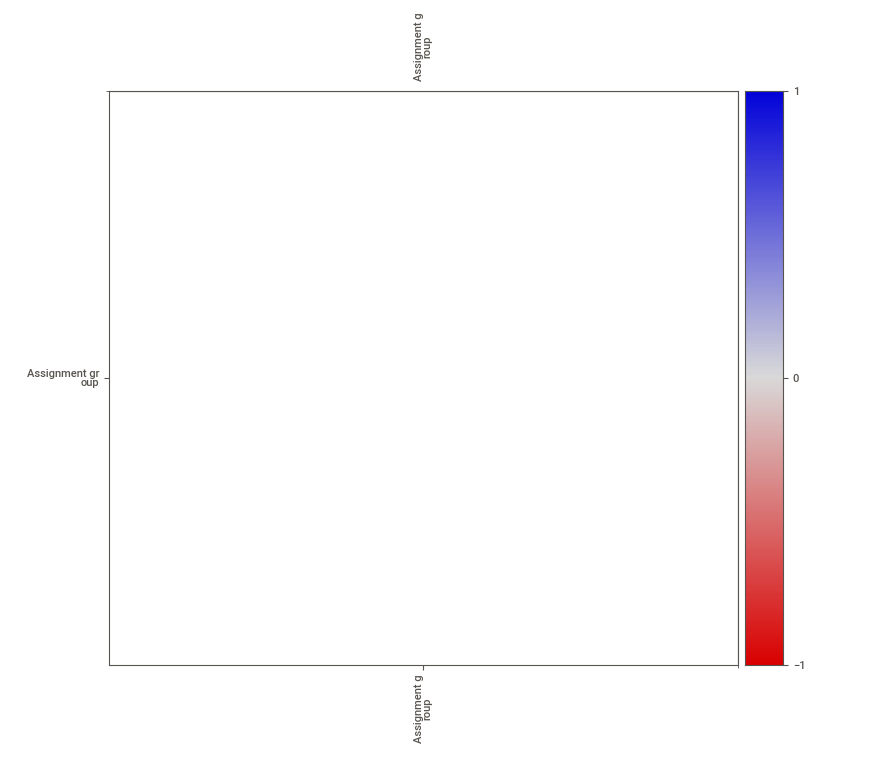
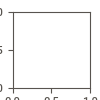

In [7]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
incidents_report = sv.analyze(incidents_data)
#display the report
incidents_report.show_html('Incidents.html')
incidents_report.show_notebook()

In [8]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 8.8MB/s 
     |████████████████████████████████| 1.1MB 38.5MB/s 
     |████████████████████████████████| 3.1MB 34.6MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 296kB 36.4MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=46b1d215881e2d17508a62659c7b047999aa38a08c26c03ce29df7be29d7033b
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=e49fc79cf5ba4fa16a05336e2ef809a2690ee7a6d65496ef30dc602355b9e273
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pa

In [9]:
from pandas_profiling import ProfileReport

In [10]:
incident_report = ProfileReport(incidents_data, html={'style': {'full_width' : True}})
incident_report.to_file(output_file='incidents_report.html')
incident_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **OBSERVATIONS**
From Above two reports we have below onservations: 
1. Total number of rows in data - 8500
2. Total features - 4
3. Short Description - Text

   Description - Text

   Caller - Text

   Assignment Group - Categorical
4. There are 83 duplicate records in total. We see further below about specific columns and strtegy to handle duplicates.
5. We shall also check if we need to create new features as I think all the columns are important. May be we can also find some hidden patterns as below: 
          A. Common Issues -> user can be trained if possible 
          B. Common Caller -> May be user needs training or help with hardware or software
          C. To find if issue is controllable or not.
          D. To find if customer is happy with service or needs further imporvement and assistance

Now let's look at individual feature
1. **Short description** 
  
   A. Total values - 8492
   
   B. Missing values - 8

   C. Distinct values - 7481

   D. Mostly occuring value - password reset
   
   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 159

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to work on the stopwords removal and also translating based on the scripts

2. **Description** 
  
   A. Total values - 8499
   
   B. Missing values - 1

   C. Distinct values - 7817

   D. Mostly occuring value - it shows "the" but we shall check this after removal of stop workds. But we consider the next which is windows password reset

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 13001

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to work on the stopwords removal and also translating based on the scripts
3. **Caller** 
  
   A. Total values - 8500
   
   B. Missing values - no missing value

   C. Distinct values - 2950

   D. Mostly occuring value - bpctwhsn kzqsbmtp (10%)

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 30

   G. It contains:
    
        Characters -> Lowercase Letter, Space_Separator, 
        Uppercase Letter, Connector_Punctuation

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to work on the stopwords removal and also translating based on the scripts
4. **Assignment Group** 
  
   A. Total values - 8500
   
   B. Missing values - no missing value

   C. Distinct values - 74

   D. Mostly occuring value - GRP_0 (47% ~ nearly half of the data --> Hence very high biased data, so strategy to be employed to reduce the bias here)

   E. We can also see the number of times each value is being repeated

   F. As this is categorical we shall Encode this using label encoder and use this for classification

   
   




In [11]:
# Print the unique assignment groups
incidents_data["Assignment group"].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [12]:
# Print the null values from data
incidents_data[incidents_data.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


## Let's replace null value with empty string

In [13]:
# Replace null(NaN) values from short description and descriptions
incidents_data['Short description'] = incidents_data['Short description'].replace(np.nan, '', regex=True)
incidents_data['Description'] = incidents_data['Description'].replace(np.nan, '', regex=True)

## Now lets see for any null values

In [14]:
# Print the null values from data
incidents_data.isnull().count()

Short description    8500
Description          8500
Caller               8500
Assignment group     8500
dtype: int64

So, as we expected there is no null values inside our dataset now

Now, let's add another column to calculate the percentage of data in each assignment group


In [15]:
incidents_data_modified = incidents_data['Assignment group'].value_counts().reset_index()
incidents_data_modified['% of Data'] = (incidents_data_modified['Assignment group']/incidents_data_modified['Assignment group'].sum())*100

In [16]:
incidents_data_modified.head(10)

,index,Assignment group,% of Data
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706
5,GRP_2,241,2.835294
6,GRP_19,215,2.529412
7,GRP_3,200,2.352941
8,GRP_6,184,2.164706
9,GRP_13,145,1.705882


## Let's visualize the graph with the entire % distribution for each assignment groups

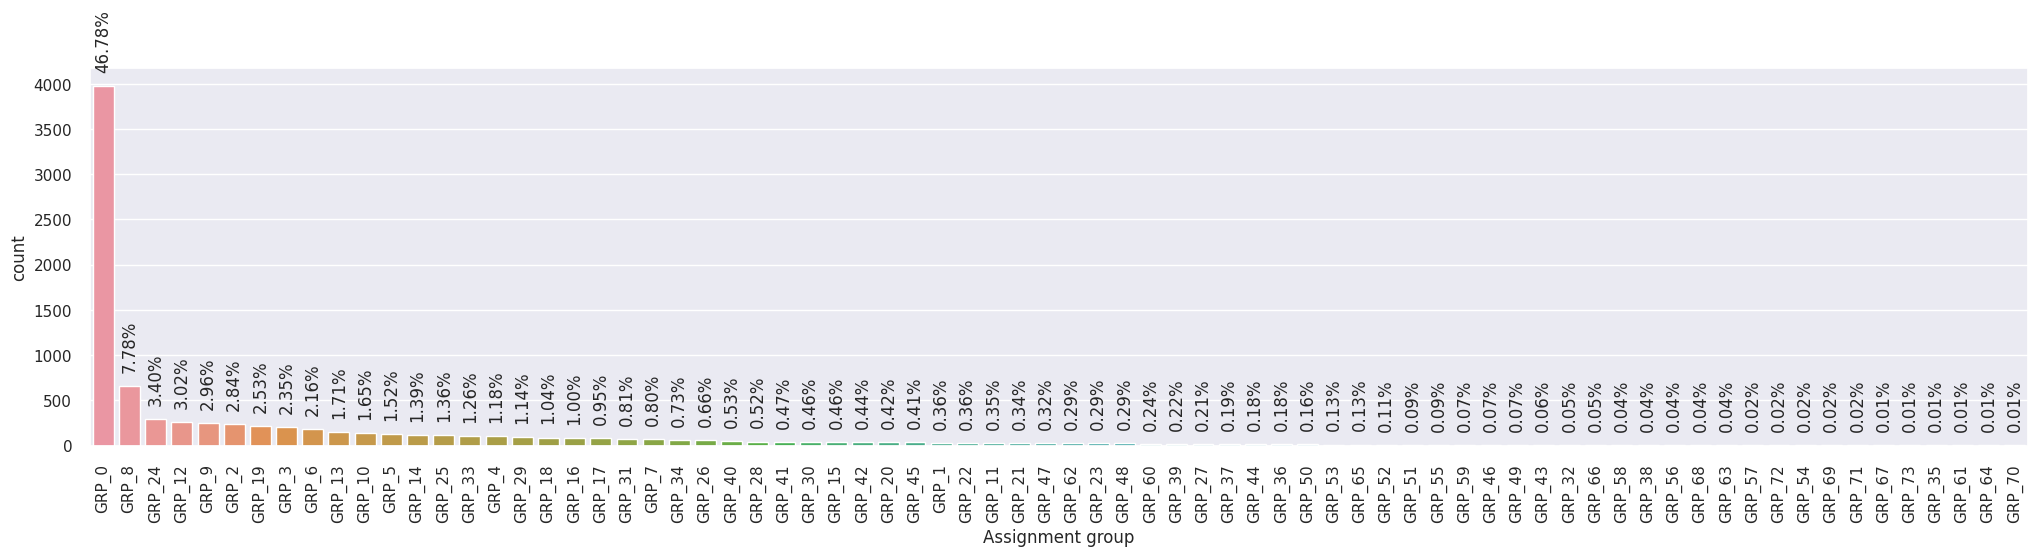

In [17]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(25,5))
axis = sns.countplot(x="Assignment group", data=incidents_data, order=incidents_data["Assignment group"].value_counts().index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
for p in axis.patches:
  axis.annotate(str(format(p.get_height()/len(incidents_data.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

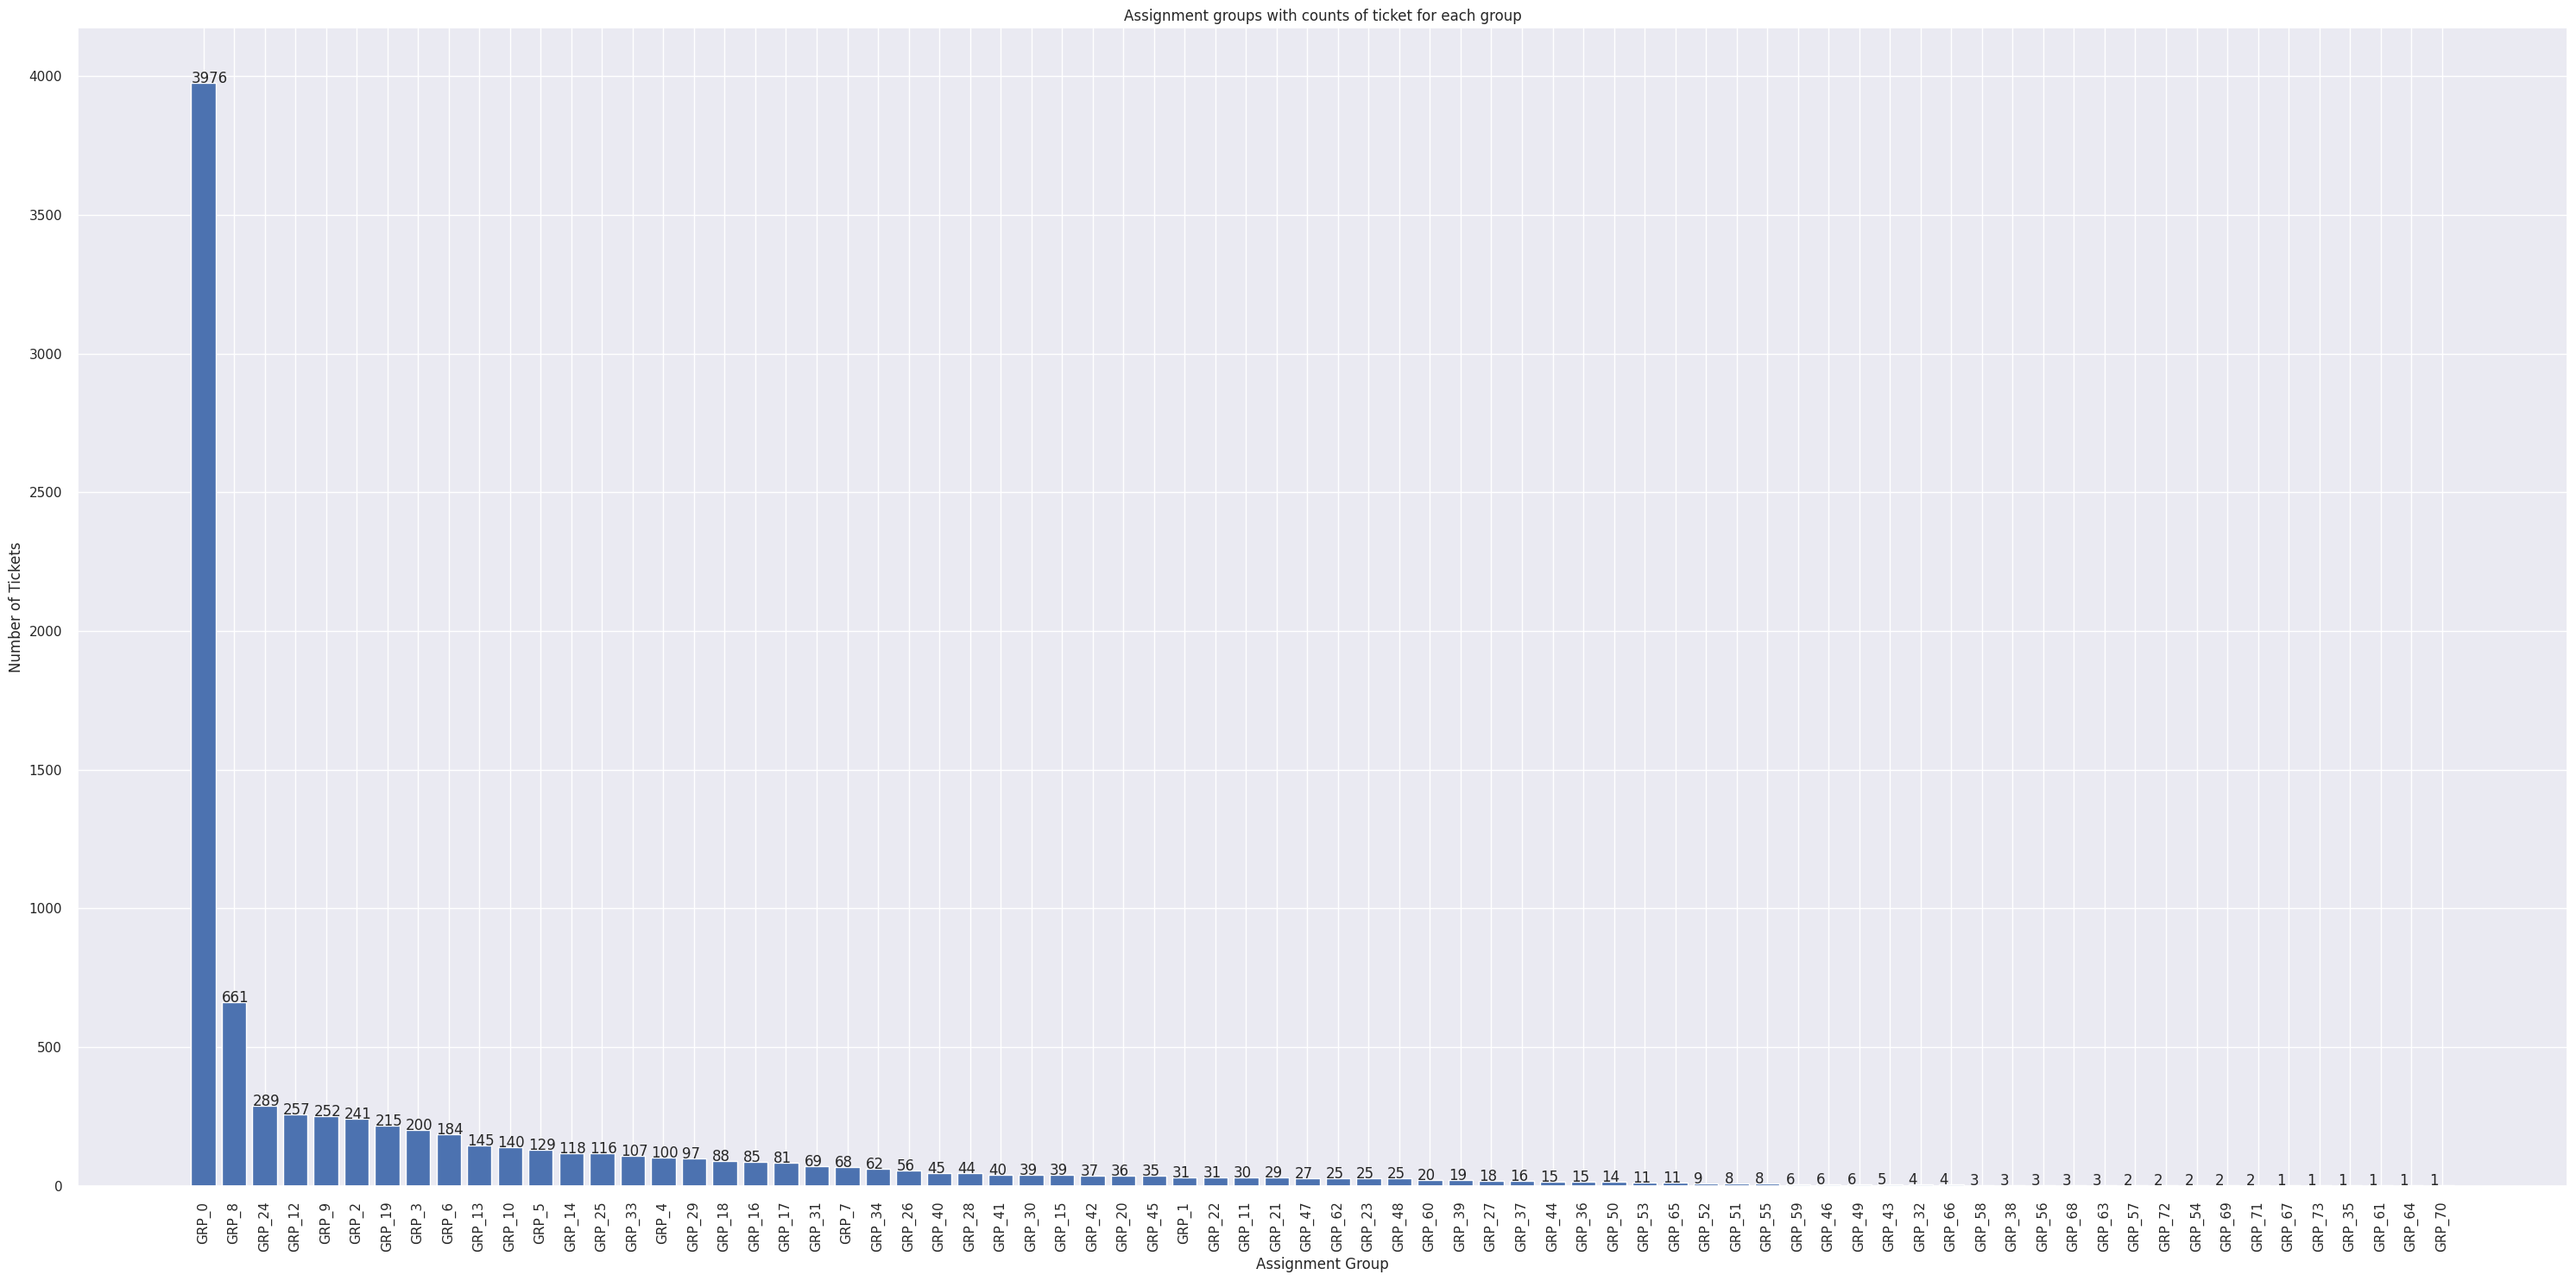

In [18]:
plt.figure(figsize=(30,15))
bars = plt.bar(incidents_data_modified['index'],incidents_data_modified['Assignment group'])
plt.title('Assignment groups with counts of ticket for each group')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

## We can use above figure to define the ranges to see which groups have tickets in below range. This will help us understand the most important groups to focus on. The ranges can be as below: 
1. 1 ticket
2. 2 tickets
3. 3-8 tickets
4. 9-14 tickets
5. 15-25 tickets
6. 25-50 tickets
7. 51-100 tickets
8. 101-200 tickets
9. 201-300 tickets
10. more than 300 tickets

In [20]:
ticket_bins = pd.DataFrame(columns=['No. of tickets','No. of Assignment groups'])
_1_ticket = {'No. of tickets':'1 ticket','No. of Assignment groups':len(incidents_data_modified[incidents_data_modified['Assignment group'] == 1])}
_2_tickets = {'No. of tickets':'2 tickets',
              'No. of Assignment groups':len(incidents_data_modified[incidents_data_modified['Assignment group'] == 2 ])}
_3_8_tickets = {'No. of tickets':' 3-8 tickets',
              'No. of Assignment groups':len(incidents_data_modified[(incidents_data_modified['Assignment group'] > 2)& (incidents_data_modified['Assignment group'] < 9)])}
_9_14_tickets = {'No. of tickets':' 9-14 tickets',
              'No. of Assignment groups':len(incidents_data_modified[(incidents_data_modified['Assignment group'] > 8)& (incidents_data_modified['Assignment group'] < 15)])}
_15_25_tickets = {'No. of tickets':' 15-25 ticket',
              'No. of Assignment groups':len(incidents_data_modified[(incidents_data_modified['Assignment group'] > 14)& (incidents_data_modified['Assignment group'] < 26)])}      
_26_50_tickets = {'No. of tickets':' 26-50 tickets',
              'No. of Assignment groups':len(incidents_data_modified[(incidents_data_modified['Assignment group'] > 25)& (incidents_data_modified['Assignment group'] < 51)])}      
_51_100_tickets = {'No. of tickets':' 51-100 tickets',
              'No. of Assignment groups':len(incidents_data_modified[(incidents_data_modified['Assignment group'] > 50)& (incidents_data_modified['Assignment group'] < 101)])}   
_101_200_tickets = {'No. of tickets':' 101-200 tickets',
              'No. of Assignment groups':len(incidents_data_modified[(incidents_data_modified['Assignment group'] > 100)& (incidents_data_modified['Assignment group'] < 201)])}
_201_300_tickets = {'No. of tickets':' 201-300 tickets',
              'No. of Assignment groups':len(incidents_data_modified[(incidents_data_modified['Assignment group'] > 200)& (incidents_data_modified['Assignment group'] < 301)])}                                                       
_301_tickets = {'No. of tickets':' > 301 tickets',
              'No. of Assignment groups':len(incidents_data_modified[(incidents_data_modified['Assignment group'] > 300)])}
# Append row to the bins
ticket_bins = ticket_bins.append([_1_ticket,_2_tickets,_3_8_tickets,
                          _9_14_tickets,_15_25_tickets,_26_50_tickets,_51_100_tickets,_101_200_tickets,_201_300_tickets,_301_tickets], ignore_index=True)

print(ticket_bins)

     No. of tickets No. of Assignment groups
0          1 ticket                        6
1         2 tickets                        5
2       3-8 tickets                       13
3      9-14 tickets                        4
4      15-25 ticket                        9
5     26-50 tickets                       13
6    51-100 tickets                        9
7   101-200 tickets                        8
8   201-300 tickets                        5
9     > 301 tickets                        2


## Let's see the assignment group distribution for the range of ticksts we see above in the form of pie chart

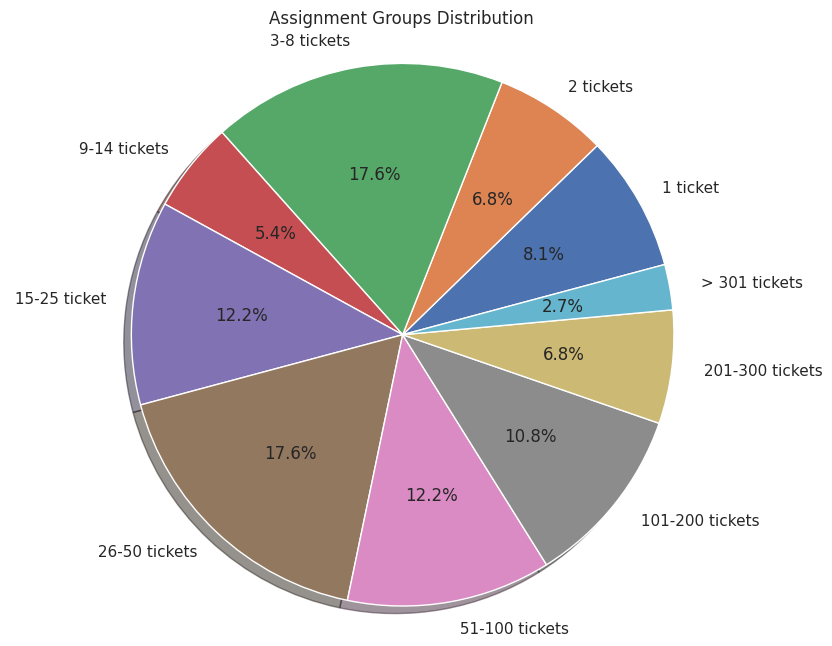

In [22]:
plt.figure(figsize=(10, 8))
plt.pie(ticket_bins['No. of Assignment groups'],labels=ticket_bins['No. of tickets'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

## From Above we see that majority of the assignment groups are in the range of either 3 to 8 tickets or 26 to 50 tickets.

## Also we see that about 20% of assignment groups have more than 100 tickets and about 8% of assignemnt groups have 1 ticket only.